In [21]:
import pandas as pd
from san.extras.backtest import Backtest

# What is Backtest

Backtest module allows to calculate portfolio returns using the series data with portfolio shares.
The backtest can be performed in the following ways:
 - Calculate net returns based only on the changes of the assets' prices and their shares in the portfolio.
 - Build the portfolio model which accepts initial investment value and takes the impact of transaction fees into account.

Backtest is designed to work together with Strategy or Strategy-inherited classes, some components may be provided from the Strategy-based entity.

# Key components

## Calculate the net returns

* What is necessary to provide:
    - the portfolio dataframe 
    - the assets' prices

* Description
The net returns dataframe contains the step-by-step returns of the portfolio.

## Calculate the portfolio price

* What is necessary to provide
    - the net returns dataframe (or the required data listed above)
    - transaction fees
    - transactions log

* Description
The net returns calculation will be launched automatically if net returns data (or some necessary part of it) is missing. 
The function builds a realistic model of the portfolio price.
The model accepts the initial investment and tracks the influence of trade fees.
The portfolio price data contains step-by-step returns and performance of the portfolio price as well.

## Portfolio
Porfolio dataframe should contain the information of assets' shares in portfolio for each date. The portfolio dataframe can be calculated with the help of Strategy or Strategy-inherited class.

## Trades log
Trades log is a dataframe which contains the portfolio trades information.
Together with fees it is requred to count the impact of transaction fees on the portfolio price. The trades log dataframe contains information for each trade in a single row, so the row indexed with the date at which the transaction was performed is a minimal required information. 

Trades log may contain it's own information of the transaction fee recorded in the 'fee' column of the trades dataframe. In that case the fees data provided in the Backtest entity will be ignored for this particular trade. For all other trades (with missing value in the 'fee' column) the entity's fees data is taken. 

## Fees
Fees is the dataframe containing the transaction fees for each point of time. Median or average fees metrics can be provided there.

## Prices
Prices should be provided as the Prices object. It contains the common and reserve assets' price data.

## Prepare the data

In [23]:
START_DT = "2020-01-01"

In [24]:
portfolio_df = pd.DataFrame(
    {
        "dt": [
            "2020-01-01",
            "2020-01-01",
            "2020-01-02",
            "2020-01-02",
            "2020-01-03",
            "2020-01-03",
            "2020-01-04",
            "2020-01-04",
            "2020-01-04",
            "2020-01-05",
            "2020-01-05",
            "2020-01-05",
        ],
        "asset": ["eth", "uni", "eth", "uni", "eth", "uni", "eth", "uni", "maker", "eth", "uni", "maker"],
        "share": [0.5, 0.5, 0.6, 0.4, 0.7, 0.3, 0.5, 0.25, 0.25, 0.5, 0.25, 0.25],
    }
).set_index("dt")
portfolio_df.set_index(pd.to_datetime(portfolio_df.index), inplace=True)

portfolio_df

,asset,share
dt,,
2020-01-01,eth,0.50
2020-01-01,uni,0.50
2020-01-02,eth,0.60
2020-01-02,uni,0.40
2020-01-03,eth,0.70
2020-01-03,uni,0.30
2020-01-04,eth,0.50
2020-01-04,uni,0.25
2020-01-04,maker,0.25


In [25]:
prices_df = pd.DataFrame(
    {
        "dt": [
            "2020-01-01",
            "2020-01-01",
            "2020-01-01",
            "2020-01-02",
            "2020-01-02",
            "2020-01-02",
            "2020-01-03",
            "2020-01-03",
            "2020-01-03",
            "2020-01-04",
            "2020-01-04",
            "2020-01-04",
            "2020-01-05",
            "2020-01-05",
            "2020-01-05",
        ],
        "asset": [
            "eth",
            "uni",
            "maker",
        ]
        * 5,
        "price": [
            1000,
            100,
            500,
            1500,
            100,
            500,
            1800,
            80,
            500,
            2250,
            100,
            500,
            2250,
            100,
            500,
        ],
    }
).set_index("dt")

prices_df.set_index(pd.to_datetime(prices_df.index), inplace=True)

In [26]:
fees_df = pd.DataFrame(
    {
        "dt": ["2020-01-01", "2020-01-02", "2020-01-03", "2020-01-04", "2020-01-05"],
        "value": [5] * 5,
    }
).set_index("dt")
fees_df.set_index(pd.to_datetime(fees_df.index), inplace=True)

In [27]:
trades_df = pd.DataFrame({"dt": ["2020-01-04"] * 5}).set_index("dt")

trades_df.set_index(pd.to_datetime(trades_df.index), inplace=True)

## Create backtest instance

In [28]:
backtest = Backtest(START_DT)

In [29]:
backtest.add_portfolio(portfolio_df)
backtest.prices.set(prices_df)
backtest.add_fees(fees_df)
backtest.add_trades(trades_df)

In [30]:
backtest.build_portfolio_price(START_DT)

In [31]:
backtest.net_returns

,value
dt,
2020-01-01,1.00
2020-01-02,1.25
2020-01-03,1.04
2020-01-04,1.25
2020-01-05,1.00


<AxesSubplot:xlabel='dt'>

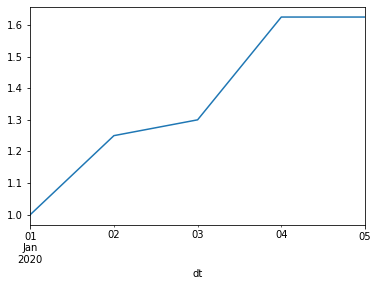

In [36]:
backtest.portfolio_price["performance"].plot()